# Multi-phone localization

## Sound source distance
Let the location of hydrophone $i$ be $h_i = (x_i,y_i.z_i)$ and the source location be $s=(s_x,s_y,s_z)$ then the distance of the source from the hydrophone is related by

\begin{equation} \tag{*}
R_i^2=(s_x-x_i)^2+(s_y-y_i)^2+(s_z-z_i)^2
\end{equation}
which becomes

\begin{equation} \tag{*}
R_i^2=(s_x^2+s_y^2+s_z^2)+(x_i^2+y_i^2+z_i^2) -2s_x x_i -2s_y y_i -2s_z z_i
\end{equation}
or in short

\begin{equation}
R_i^2=|s|^2+|h_i|^2-2h_i^Ts
\end{equation}

Having more then 1 hydrophone, then for any pair of hydrophones $(h_i, h_j)$ one can form the difference obtaining

\begin{equation}
R_i^2-R_j^2=|h_i|^2-|h_j|^2-2(h_i-h_j)^Ts
\end{equation}

Noting that $R_i^2-R_j^2=(R_j+(\delta R_{ij}))^2-R_j^2 = 2(\delta R_{ij})R_j+(\delta R_{ij})^2 $ 

one gets the linear equation

\begin{equation}
2(\delta R_{ij})R_j+(\delta R_{ij})^2=|h_i|^2-|h_j|^2-2(h_i-h_j)^Ts
\end{equation}
or, by putting the unknown source location to the left side and dividing by 2

\begin{equation}
(h_i-h_j)^Ts=\frac{|h_i|^2-|h_j|^2-(\delta R_{ij})^2}{2}-(\delta R_{ij})R_j
\end{equation}



### System of equations
Let the number of hydrophones be $n+1$ then one gets $n$ equations

\begin{equation}
\left(\begin{matrix}(x_1-x_0)&(y_1-y_0)&(z_1-z_0)\\\vdots&\vdots&\vdots\\(x_n-x_0)&(y_n-y_0)&(z_n-z_0)\end{matrix}\right)s
=\frac{1}{2}
\left(\begin{matrix}|h_1|^2-|h_0|^2-(\delta R_{10})^2\\\vdots\\|h_n|^2-|h_0|^2-(\delta R_{n0})^2\end{matrix}\right)
-\left(\begin{matrix}\delta R_{10}\\\vdots\\\delta R_{n0}\end{matrix}\right)R_0
\end{equation}

or in matrix notation

\begin{equation}
As=b_0-b_1R_0
\end{equation}
whereby

\begin{equation}
A=\left(\begin{matrix}(x_1-x_0)&(y_1-y_0)&(z_1-z_0)\\\vdots&\vdots&\vdots\\(x_n-x_0)&(y_n-y_0)&(z_n-z_0)\end{matrix}\right)
\end{equation}

\begin{equation}
b_0=\frac{1}{2}
\left(\begin{matrix}|h_1|^2-|h_0|^2-(\delta R_{10})^2\\\vdots\\|h_n|^2-|h_0|^2-(\delta R_{n0})^2\end{matrix}\right)
\end{equation}

\begin{equation}
b_1=\left(\begin{matrix}\delta R_{10}\\\vdots\\\delta R_{n0}\end{matrix}\right)
\end{equation}


### Pseudo inverse
A system of equations for three unknows $s=(s_x,s_y,s_z)$ cannot be solved without additional constraints if the number of independent equations is different of three. The additional constraint, whicht is typically assumed is that the vector norm $||s|| \to \min$ that leads to the (Penrose) pseudo inverse $A^+$

Definintion of pseudo inverse $A^+$

\begin{equation}
    A A^+ A = A
\end{equation}

For an underdetermined system, i.e. number of equation < number of unknows, or rank of matrix $A$ < numbers of unknown, the pseudo inverse is given by

\begin{equation}
    A^+ = A^T(AA^T)^{-1}
\end{equation}

For an overdetermined system, i.e. number of equation > number of unknows, or rank of matrix $A$ < numbers of equations, the pseudo inverse is given by

\begin{equation}
    A^+ = (A^TA)^{-1}A^T
\end{equation}
which is the classical least mean square (LMS) fit

### Source location and range estimation
With

\begin{align}
u_0 =& A^+ b_0\\
u_1 =& A^+ b_1
\end{align}
the source vector becomes

\begin{equation}
s=u_0-u_1R_0
\end{equation}
Knowing that

\begin{equation}
R_0^2=|s-h_0|^2=|u_0-h_0-u_1R_0|^2
\end{equation}
or

\begin{equation}
R_0^2=|u_0-h_0|^2-2(u_0-h_0)^Tu_1R_0 + |u_1|^2R_0^2
\end{equation}
one obtains a quadratic equation in $R_0$

\begin{equation}
(|u_1|^2-1)R_0^2 -2(u_0-h_0)^Tu_1R_0 +|u_0-h_0|^2=0
\end{equation}

#### Quadratic equation
For a quadratic equation

\begin{equation}
ax^2+bx+c=0
\end{equation}

the solution is known to be

\begin{equation}
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
\end{equation}

To apply the solution of a quadratic equation one defines

\begin{equation}
a=(|u_1|^2-1)
\end{equation}

\begin{equation}
b=-2(u_0-h_0)^Tu_1
\end{equation}

\begin{equation}
c=|u_0-h_0|^2
\end{equation}



## Localization with five or more hydrophones
Five or more hydrophones allow at least 4 hydrophone pairs that in matrix notation are written as

### method 1
Let the number of hydrophones be $n+1$ then one gets $n$ equations

\begin{equation}
\left(\begin{matrix}(x_1-x_0)&(y_1-y_0)&(z_1-z_0)\\\vdots&\vdots&\vdots\\(x_n-x_0)&(y_n-y_0)&(z_n-z_0)\end{matrix}\right)s
=\frac{1}{2}
\left(\begin{matrix}|h_1|^2-|h_0|^2-(\delta R_{10})^2\\\vdots\\|h_n|^2-|h_0|^2-(\delta R_{n0})^2\end{matrix}\right)
-\left(\begin{matrix}\delta R_{10}\\\vdots\\\delta R_{n0}\end{matrix}\right)R_0
\end{equation}

that again transforms to a vector 

\begin{equation}
s=u_0 - u_1R_0
\end{equation}
with

\begin{align}
u_0=&A^+b_0\\
u_1=&A^+b_1
\end{align}


z: [[-0.9614814  -0.06958701  0.93023403]]
u1: [[ 0.08777084  0.0063524  -0.08491836]]
az: [-175.86044785] el: [43.9788835]
azo: -175.8604478533724 elo: 43.97888350072386
S: [ 4. 10.  2.] r0: 10.95445115010333


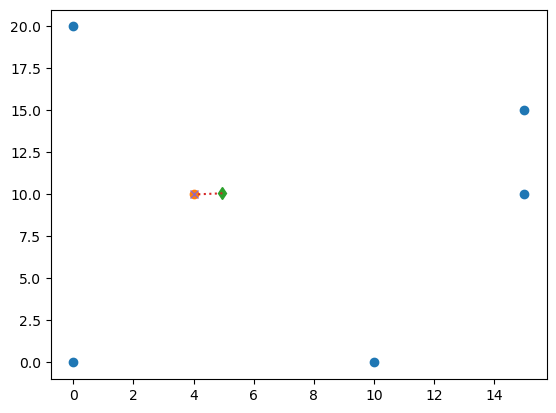

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# five hydrophones
# method 1
h=np.array([[0,0,0],[10,0,0],[0,20,0],[15,15,5],[15,10,5]])
D=h[1:,:]-h[0,:].reshape(1,-1)
DI=np.linalg.pinv(D)

#simulasted whale location
w=np.array([4,10,2])

# whale directions from hydrophone
D=w-h
# slant ranges
R=np.sqrt(np.sum(D**2,1))

# for selecting hydrophone pairs
im1=[1,2,3,4]
im0=[0,0,0,0]
#
# simulated path differences
DR=R[im1]-R[im0]

def direction(DI,h,im1,im0,DR):
    # estimation method 1
    b0=1/2*(np.sum(h[im1,:]**2,1) - np.sum(h[im0,:]**2,1)-(DR**2))
    b1=DR

    u0=(DI@b0).reshape(-1,1)
    u1=(DI@b1).reshape(-1,1)

    # direction estimation
    az=np.arctan2(-u1[1],-u1[0])*180/np.pi
    el=np.arctan2(-u1[2],np.sqrt(u1[0]**2+u1[1]**2))*180/np.pi

    return u0,u1,az,el

u0,u1,az,el=direction(DI,h,im1,im0,DR)
# check with simulation
z=w-u0.T
z1=z/np.sqrt(np.sum(z**2))
azo=np.arctan2(z1[0,1],z1[0,0])*180/np.pi
elo=np.arctan2(z1[0,2],np.sqrt(z1[0,0]**2+z1[0,1]**2))*180/np.pi
print('z:',z)
print('u1:',u1.T)
print('az:',az, 'el:',el)
print('azo:',azo,'elo:',elo)

# range estimation
def rangeEstimation(u0,u1,h):
    h0=h.reshape(-1,1)
    aa=np.sum(u1**2)-1
    bb=-np.sum((u0-h0)*u1)
    cc=np.sum((u0-h0)**2)
    r0=(-bb-np.sqrt(bb*bb-aa*cc))/(aa)
    S=(u0-u1*r0)[:,0]
    return S,r0

S,r0=rangeEstimation(u0,u1,h[0,:])
print('S:',S,'r0:',r0)

# to visualize direction
rr=np.arange(0,10,0.01)
vv=u0-u1*rr

if 1:
    plt.plot(h[:,0],h[:,1],'o')
    plt.plot(w[0],w[1],'o')
    plt.plot(u0[0],u0[1],'d')
    plt.plot(vv[0,:],vv[1,:],':')
    plt.plot(S[0],S[1],'x')
    plt.show()


### method 2
Let the number of hydrophones be again $n+1$ then one gets $n$ equations

\begin{equation}
\left(\begin{matrix}\delta R_{10}&(x_1-x_0)&(y_1-y_0)&(z_1-z_0)\\\vdots&\vdots&\vdots&\vdots\\\delta R_{n0}&(x_n-x_0)&(y_n-y_0)&(z_n-z_0)\end{matrix}\right)\left(\begin{matrix}R_0\\s_y\\s_y\\s_z\end{matrix}\right)
=\frac{1}{2}
\left(\begin{matrix}|h_1|^2-|h_0|^2-(\delta R_{10})^2\\\vdots\\|h_n|^2-|h_0|^2-(\delta R_{n0})^2\end{matrix}\right)
\end{equation}
The solution of which using the LMS pseudo inverse gives directly the source co-ordinates and the source range from the reference hydrophone

w: [ 4 10  2] S: [ 4. 10.  2.]
R[0]: 10.954451150103322 r0: 10.954451150103374


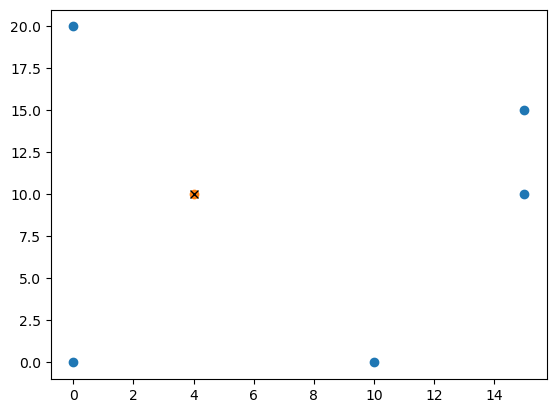

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# five hydrophones
# method 2
h=np.array([[0,0,0],[10,0,0],[0,20,0],[15,15,5],[15,10,5]])

#simulasted whale location
w=np.array([4,10,2])

# whale directions from hydrophones
RX=w-h
# slant ranges
R=np.sqrt(np.sum(RX**2,1))

# for selecting hydrophone pairs
im1=[1,2,3,4]
im0=[0,0,0,0]
#
# simulated path differences
DR=R[im1]-R[im0]

# estimation method 2
def localization(h,im1,im0,DR):
        
    b0=1/2*(np.sum(h[im1,:]**2,1) - np.sum(h[im0,:]**2,1)-(DR**2))
    b1=DR

    D=h[im1,:]-h[im0,:]
    A=np.append(b1.reshape(-1,1),D,1)
    AI=np.linalg.pinv(A)

    u0=AI@b0
    r0=u0[0]
    S=u0[1:]

    return S,r0

S,r0=localization(h,im1,im0,DR)

# check with simulation
print('w:',w,'S:',S)
print('R[0]:',R[0],'r0:',r0)

if 1:
    plt.plot(h[:,0],h[:,1],'o')
    plt.plot(w[0],w[1],'o')
    plt.plot(S[0],S[1],'kx')
    plt.show()


## Four-hydrophone localization

Four hydrophones allow 3 hydrophone pairs that in matrix notation are written as

\begin{equation}
\left(\begin{matrix}(x_1-x_0)&(y_1-y_0)&(z_1-z_0)\\(x_2-x_0)&(y_2-y_0)&(z_2-z_0)\\(x_3-x_0)&(y_3-y_0)&(z_3-z_0)\end{matrix}\right)s
=\frac{1}{2}
\left(\begin{matrix}|h_1|^2-|h_0|^2-(\delta R_{10})^2\\|h_2|^2-|h_0|^2-(\delta R_{20})^2\\|h_3|^2-|h_0|^2-(\delta R_{30})^2\end{matrix}\right)
-\left(\begin{matrix}\delta R_{10}\\\delta R_{20}\\\delta R_{30}\end{matrix}\right)R_0
\end{equation}
or equivalently

\begin{equation}
s=u_0-u_1R_0
\end{equation}
and the solution is obtained via the quadratic equation in $R_0$


z: [[-0.9614814  0.        -0.3919192]]
u1: [[8.77708416e-02 1.91364755e-17 3.57771647e-02]]
az: [-180.] el: [-22.17679975]
azo: 180.0 elo: -22.176799751820553
S: [ 4. 10.  2.] r0: 10.954451150103324


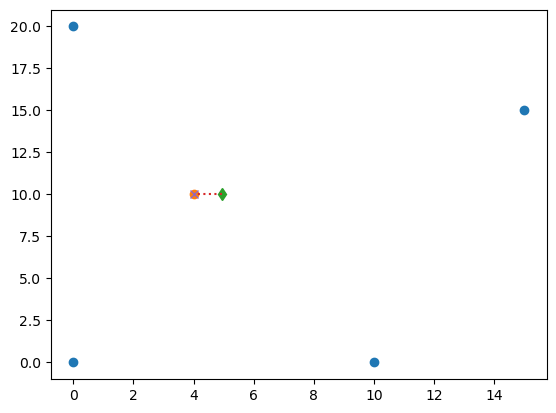

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# four hydrophones
h=np.array([[0,0,0],[10,0,0],[0,20,0],[15,15,5]])
D=h[1:,:]-h[0,:].reshape(1,-1)
DI=np.linalg.pinv(D)

#simulasted whale location above hydrophone plane
w=np.array([4,10,2])

# whale directions from hydrophone
D=w-h
# slant ranges
R=np.sqrt(np.sum(D**2,1))

# for selecting hydrophone pairs
im1=[1,2,3]
im0=[0,0,0]
#
# simulated path differences
DR=R[im1]-R[im0]

u0,u1,az,el=direction(DI,h,im1,im0,DR)

# check with simulation
z=w-u0.T
z1=z/np.sqrt(np.sum(z**2))
azo=np.arctan2(z1[0,1],z1[0,0])*180/np.pi
elo=np.arctan2(z1[0,2],np.sqrt(z1[0,0]**2+z1[0,1]**2))*180/np.pi
print('z:',z)
print('u1:',u1.T)
print('az:',az, 'el:',el)
print('azo:',azo,'elo:',elo)

# range estimation
S,r0=rangeEstimation(u0,u1,h[0,:])

print('S:',S,'r0:',r0)


# to visualize direction
rr=np.arange(0,10,0.01)
vv=u0-u1*rr

if 1:
    plt.plot(h[:,0],h[:,1],'o')
    plt.plot(w[0],w[1],'o')
    plt.plot(u0[0],u0[1],'d')
    plt.plot(vv[0,:],vv[1,:],':')
    plt.plot(S[0],S[1],'x')
    plt.show()



## Three-hydrophone localization
With three hydrophones once can form two pairs of hydrophones and one gets a system of two equations

\begin{equation}
\left(\begin{matrix}(x_1-x_0)&(y_1-y_0)&(z_1-z_0)\\(x_2-x_0)&(y_2-y_0)&(z_2-z_0)\end{matrix}\right)s
=\frac{1}{2}
\left(\begin{matrix}|h_1|^2-|h_0|^2-(\delta R_{10})^2\\|h_2|^2-|h_0|^2-(\delta R_{20})^2\end{matrix}\right)
-\left(\begin{matrix}\delta R_{10}\\\delta R_{20}\end{matrix}\right)R_0
\end{equation}
which cannot be solved using standard algebraic methods (matix inversion), but requires the use of what is called a pseudo inverse and additional contraints or data.

To estimate source location with three hydrophones requires the knowledge of one component of the source vector. This is typically the z-component $s_z$.

The source range $R_0$ is then estimated ba adding the assumed z-component $s_z$ as constant to the quadratic equation 

\begin{equation}
c=|u_0-h_0|^2+(s_z-z_0)^2=(u_{0x}-x_0)^2+(u_{0y}-y_0)^2+(s_z-z_0)^2
\end{equation}

z: [[-0.9614814  0.         2.       ]]
u1: [[0.08777084 0.         0.        ]]
az: [-180.]
azo: 180.0
S: [ 4. 10.  2.] r0: 10.95445115010332


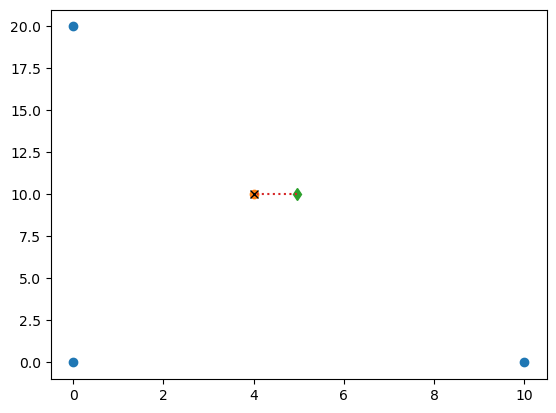

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# three hydrophones
h=np.array([[0,0,0],[10,0,0],[0,20,0]])
D=h[1:,:]-h[0,:].reshape(1,-1)
DI=np.linalg.pinv(D)

#simulasted whale location above hydrophone plane
w=np.array([4,10,2])

# whale directions from hydrophone
D=w-h
# slant ranges
R=np.sqrt(np.sum(D**2,1))

# for selecting hydrophone pairs
im1=[1,2]
im0=[0,0]
#
# simulated path differences
DR=R[im1]-R[im0]

u0,u1,az,el=direction(DI,h,im1,im0,DR)

# check with simulation
z=w-u0.T
z1=z/np.sqrt(np.sum(z**2))
azo=np.arctan2(z1[0,1],z1[0,0])*180/np.pi
print('z:',z)
print('u1:',u1.T)
print('az:',az)
print('azo:',azo)


# range estimation
# assume known z-component
u1[2]=0
u0[2]=w[2]
#
S,r0=rangeEstimation(u0,u1,h[0,:])
print('S:',S,'r0:',r0)

# to visualize direction
rr=np.arange(0,10,0.01)
vv=u0-u1*rr

if 1:
    plt.plot(h[:,0],h[:,1],'o')
    plt.plot(w[0],w[1],'o')
    plt.plot(u0[0],u0[1],'d')
    plt.plot(vv[0,:],vv[1,:],':')
    plt.plot(S[0],S[1],'kx')
    plt.show()

## Two-hydrophone localization
with two hydrophones, one can form a single pair and with $(i,j)=(1,0)$ the resulting single equation becomes

\begin{equation}
(h_1-h_0)^Ts=\frac{|h_1|^2-|h_0|^2-(\delta R_{10})^2}{2}-(\delta R_{10})R_0
\end{equation}
which cannot be solved for the source location without knowing two of the three components of the source vector. While sometimes the vertical, or z component of the source vector may be guessed an assumed, this is nearly impossible for the still missing horizontal component of the source vector. 

With only two hydrophones, localization is nearly impossible, but the direction of the soundsource may still be obtained, if the source is far away.
